In [14]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [15]:
df = pd.read_csv('fraud.csv')

In [16]:
df.head()

,time,amount
0,3.672395,2.382784
1,2.628687,4.028316
2,3.068290,4.867387
3,3.177967,4.224654
4,4.090583,4.126540


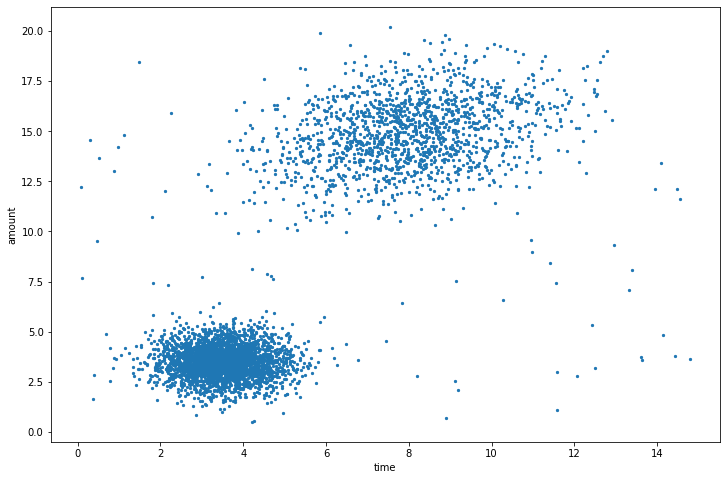

In [19]:
plt.scatter(df['time'],df['amount'], s=5)
plt.xlabel('time')
plt.ylabel('amount')
plt.show()

In [20]:
less_dense = df.loc[df['amount'] >= 7.5]

# Elliptic Envelope

### On First cluster

In [28]:
pd.Series(label).value_counts(normalize=True)

 1    0.899935
-1    0.100065
dtype: float64

In [52]:
label = EllipticEnvelope(random_state=0, contamination=0.01).fit(less_dense.iloc[:,:2])

In [ ]:
label.

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_37713/2029956369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_dense['is_outlier_ee'] = label


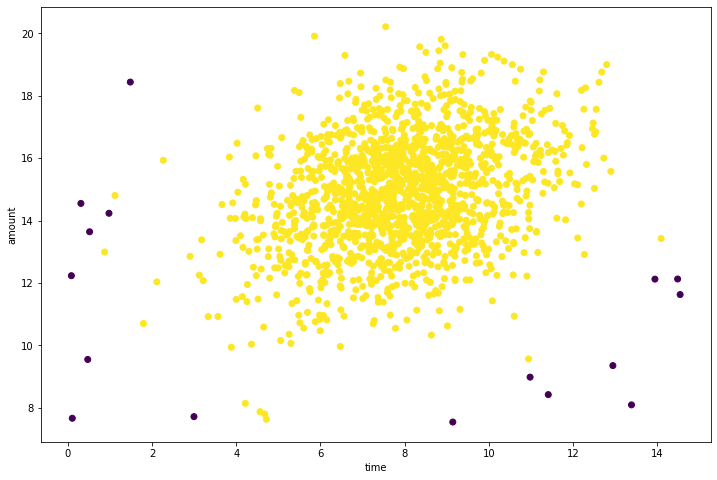

In [31]:
label = EllipticEnvelope(random_state=0, contamination=0.01).fit(less_dense.iloc[:,:2])
less_dense['is_outlier_ee'] = label



# Plotting
plt.scatter(less_dense['time'], less_dense['amount'], c=less_dense['is_outlier_ee'])
plt.xlabel('time')
plt.ylabel('amount')
plt.show()

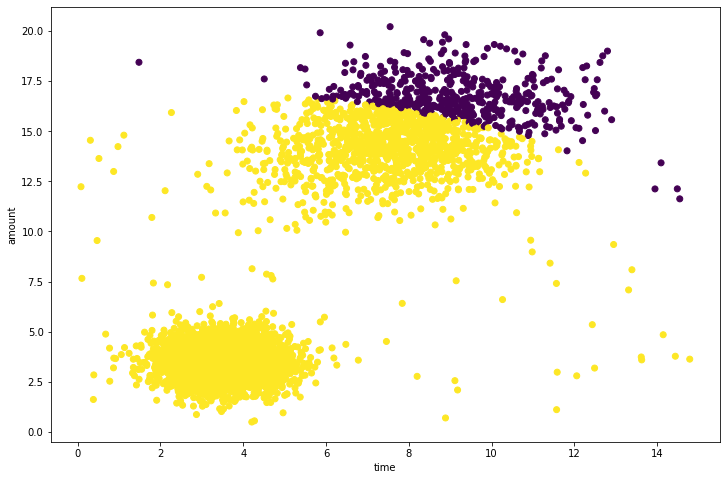

In [32]:
cov = EllipticEnvelope(random_state=0).fit_predict(df.iloc[:,:2])
df['is_outlier_ee'] = cov
plt.scatter(df['time'], df['amount'], c=df['is_outlier_ee'])
plt.xlabel('time')
plt.ylabel('amount')
plt.show()

In [9]:
df['is_outlier_ee'].value_counts()

 1    4122
-1     458
Name: is_outlier_ee, dtype: int64

## Isolation Forest

In [53]:
clf = IsolationForest(contamination = 0.05, random_state=0, n_estimators=1000).fit(df.iloc[:, :2])


/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


/Users/gyanarora/miniconda3/envs/scaler/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


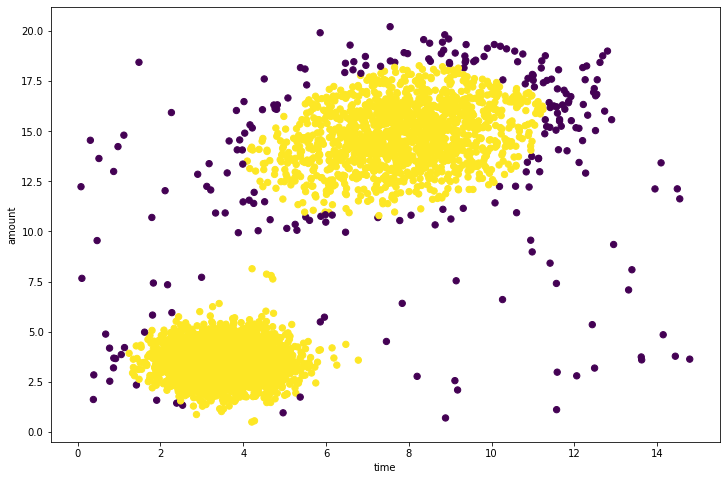

In [40]:
clf = IsolationForest(contamination = 0.05, random_state=0, n_estimators=1000).fit_predict(df.iloc[:, :2])


df['is_outlier_if'] = clf
plt.scatter(df['time'], df['amount'], s=40, c=df['is_outlier_if'])
plt.xlabel('time')
plt.ylabel('amount')
plt.show()

In [11]:
df['is_outlier_if'].value_counts()

 1    4442
-1     138
Name: is_outlier_if, dtype: int64

## LOF

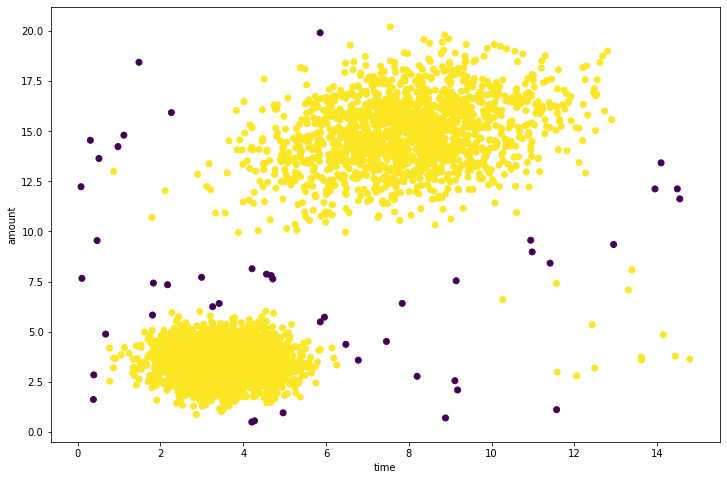

In [47]:
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.01).fit_predict(df.iloc[:, :2])


df['is_outlier_lof'] = clf
plt.scatter(df['time'], df['amount'], c=df['is_outlier_lof'])
plt.xlabel('time')
plt.ylabel('amount')
plt.show()

In [13]:
df.head(2)

,time,amount,is_outlier_ee,is_outlier_if,is_outlier_lof
0,3.672395,2.382784,1,1,1
1,2.628687,4.028316,1,1,1
